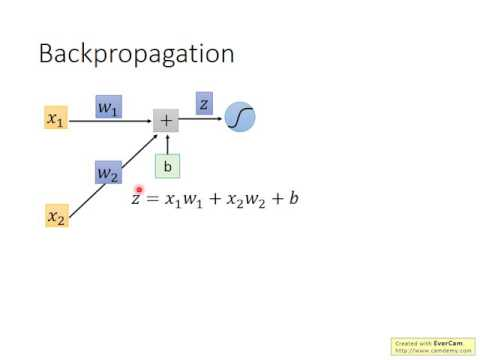

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('ibJpTrp5mcE')

## Back Propadation

### 其實他就是 Gradient Descent ， 只是在<font color="red">面對「百萬維」的參數量</font>時，計算量更精簡




- 25:45 

從前面往後（左邊往右）算的運算量其實非常大

但如果<font color="red">從最後一層 output layer 的偏微分算回來</font>，因為 <font color="red">Chain Rule</font> 的關係，一切就都萬事俱備、迎刃而解

這就是 Back Propadation，就是建一個反過來方向的 Neural Network 啦

## 反向傳播（BP：Backpropagation）

- ### 是「誤差反向傳播」的簡稱，是⼀種與最優化⽅法（如梯度下降法）結合使⽤的該⽅法對網路中所有權重計算損失函數的梯度。這個梯度會反饋給最優化⽅法，⽤來更新權值以最⼩化損失函數。




- ### 反向傳播要求有對每個輸入值想得到的已知輸出，來計算損失函數梯度。因此，它通常被認為是⼀種監督式學習⽅法，可以對每層疊代計算梯度。反向傳播要求⼈⼯神經元（或「節點」）的啟動函數可微。

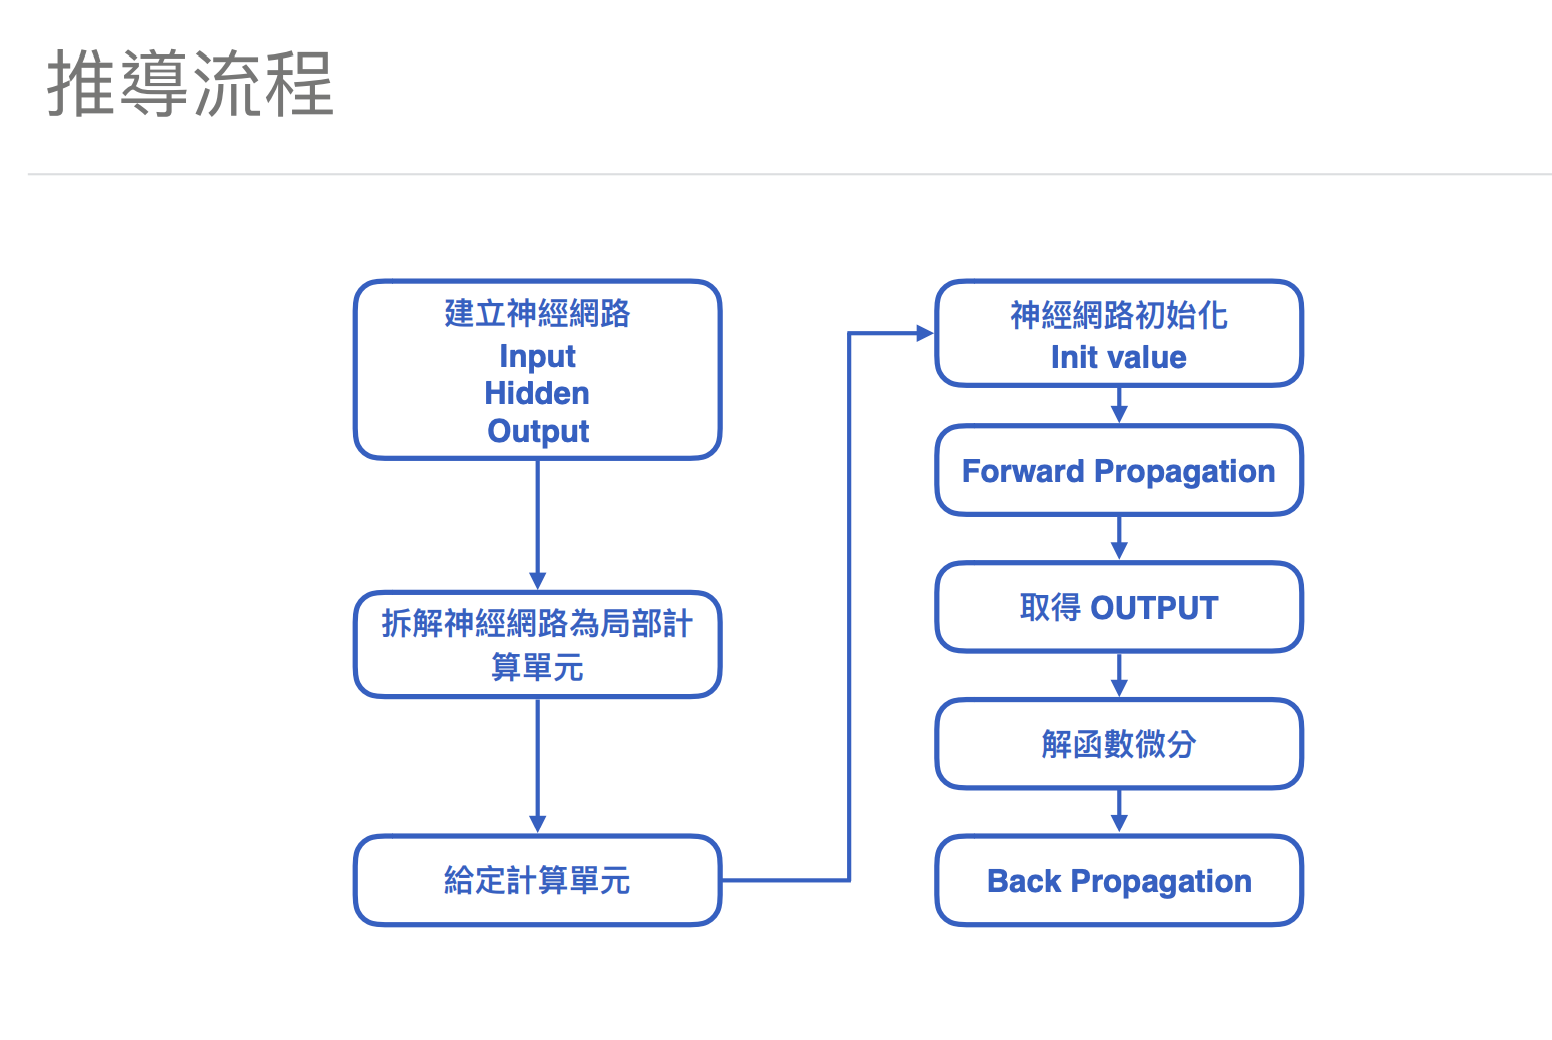

## 進⼀步說明

更改 init data，輸出會有變動，模型的執⾏結果跟預期有落差也是變動，這個落差就是 error rate

• Error rate = (Target 輸出) – (實際輸出)

• 導入 activation function，以 MSE loss function 為例

• Error rate

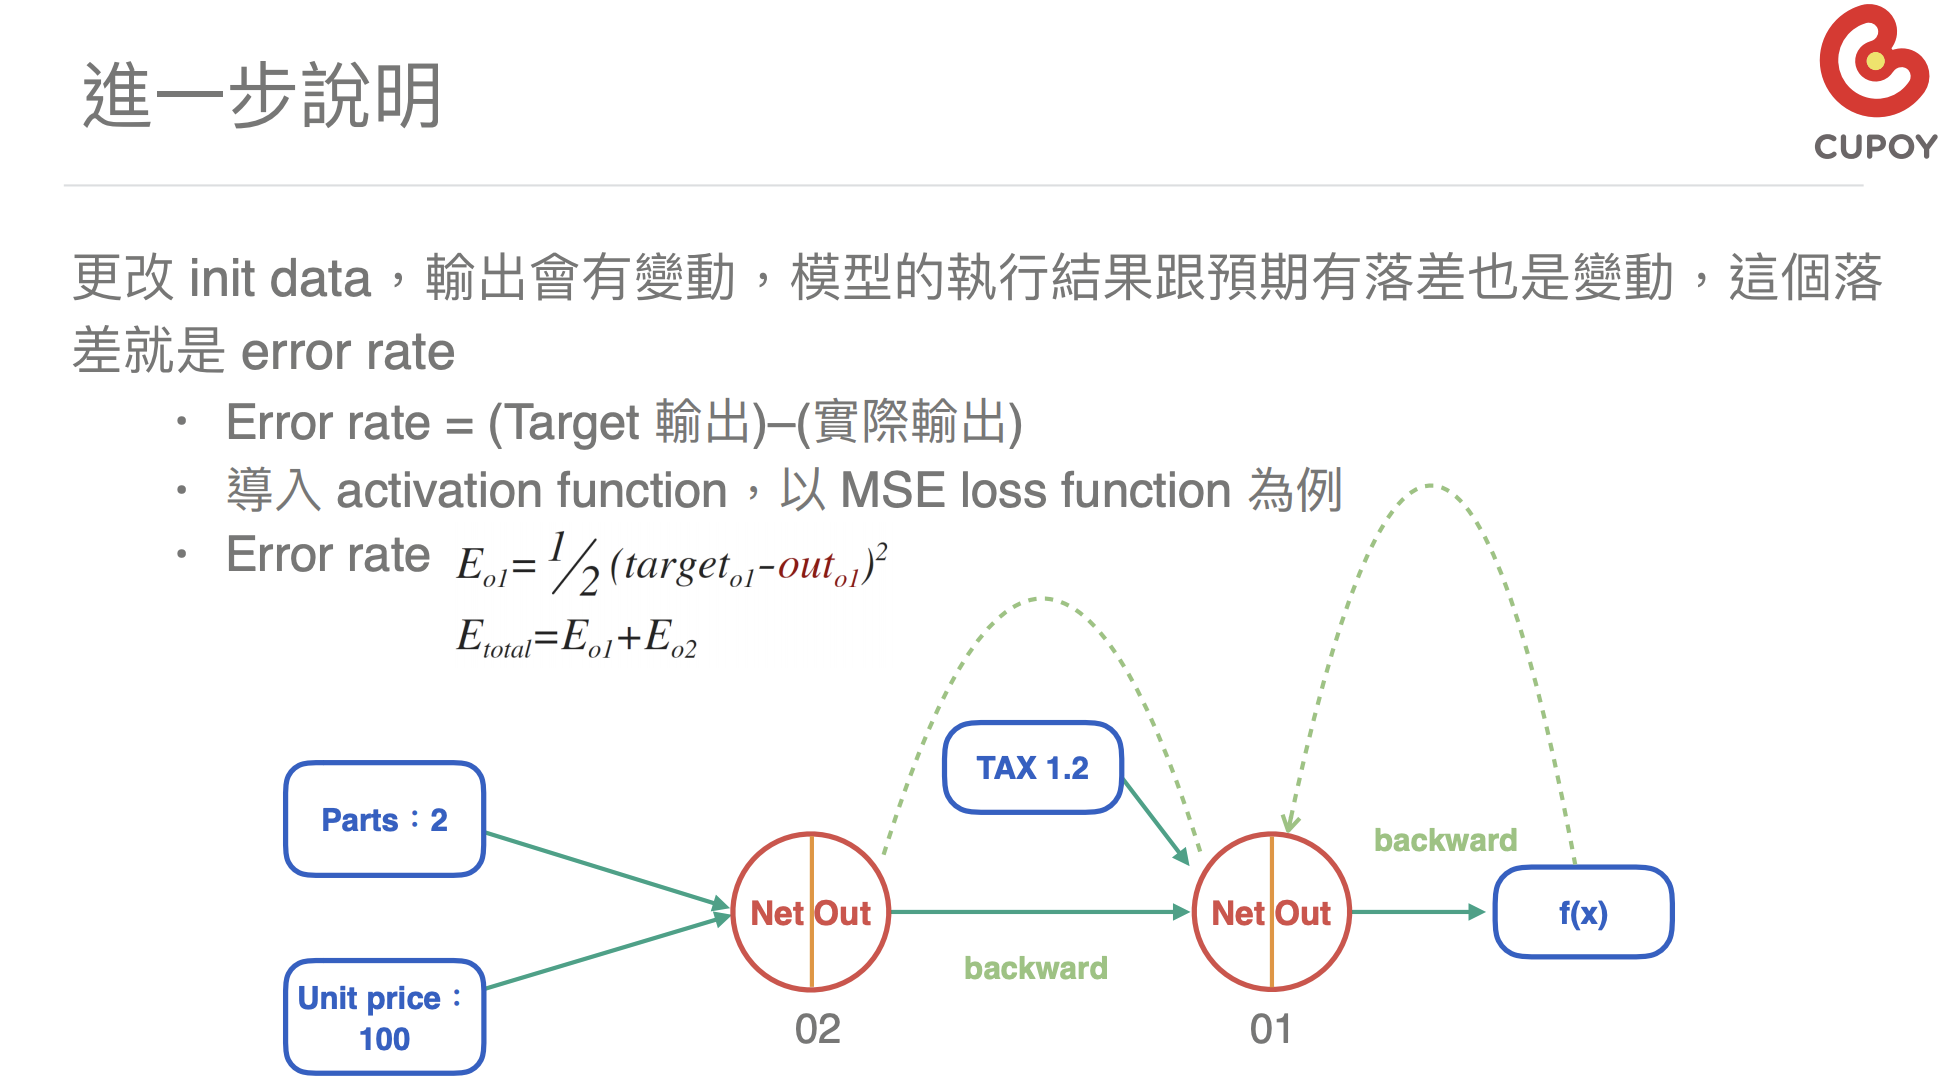

## 重要知識點複習：

BP 神經網路是⼀種按照逆向傳播算法訓練的多層前饋神經網路

### 優點：具有任意複雜的模式分類能⼒和優良的多維函數映射能⼒，解決了簡單感知器不能解決的異或或者⼀些其他的問題。

    • 從結構上講，BP 神經網路具有輸入層、隱含層和輸出層。

    • 從本質上講，BP 算法就是以網路誤差平⽅⽬標函數、採⽤梯度下降法來計算⽬標函數的最⼩值。

### 缺點：

> ①學習速度慢，即使是⼀個簡單的過程，也需要幾百次甚⾄上千次的學習才能收斂。

> ②容易陷入局部極⼩值。

> ③網路層數、神經元個數的選擇沒有相應的理論指導。

> ④網路推廣能⼒有限。

> 應⽤：①函數逼近。②模式識別。③分類。④數據壓縮


### 第1階段：解函數微分

    • 每次疊代中的傳播環節包含兩步：

    • （前向傳播階段）將訓練輸入送入網路以獲得啟動響應；

    • （反向傳播階段）將啟動響應同訓練輸入對應的⽬標輸出求差，從⽽獲得輸出層和隱藏層的響應誤差。

### 第2階段：權重更新

    • Follow Gradient Descent

    • 第 1 和第 2 階段可以反覆循環疊代，直到網路對輸入的響應達到滿意的預定的⽬標範圍為⽌。

## 在課程的範例程式：

BP Neural Network

    - 實現 forward network，解函數微分求 Loss rate

        • Linear： Error rate = (target_out – real_out)

    - Weights refresh per iteration

    - Training and update

    - 得出 Loss rate 

## 課程目標:

了解反向傳播的原理與在神經網路推倒過程中的作用

## 範例重點:

(1)自定義神經網路架構

(2) 初始值設定

(3) 使用範例

In [2]:
# 定義並建立一神經網路
class mul_layer():
    
    def _init_(self):
        self.x = None
        self.y = None
        
    # forward-propagation  
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        return out
    
    # backward-propagation  
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

In [3]:
# 初始值設定
n_X = 2
price_Y = 100
b_TAX = 1.1

# 指定Build _Network組合
mul_fruit_layer = mul_layer()
mul_tax_layer = mul_layer()

## 以購買水果為例:

付費總價格是根據水果價格, 稅金變動而受影響

水果價格是根據購買數量與單品價格而變動

可以利用每一個cell (cell - 1: 水果價格; cell - 2: 付費總價格), 推導微分的結果

In [4]:
#forward 
fruit_price = mul_fruit_layer.forward(price_Y, n_X)
total_price = mul_tax_layer.forward(fruit_price, b_TAX)

#backward 
dtotal_price = 1 # this is linear function, which y=x, dy/dx=1
d_fruit_price, d_b_TAX = mul_tax_layer.backward(dtotal_price)
d_price_Y, d_n_X =  mul_tax_layer.backward(d_fruit_price)

In [5]:
# result
print("fruit price: %i"%fruit_price)
print("針對所有水果價格微分, 得到 TAX: %2f" %d_fruit_price)

fruit price: 200
針對所有水果價格微分, 得到 TAX: 1.100000


## 作業目標:

通過建立多層的神經網路, 了解權值矩陣更新

## 作業重點:

3 層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [6]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x, deriv = False) :
    if (deriv == True) :
        return x * (1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] 
             ])  
        
"""
define y for output dataset   
"""
y = np.array([ [0,0,1,1] 
             ]).T

In [7]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [8]:
y

array([[0],
       [0],
       [1],
       [1]])

In [9]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
# 亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
# 但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2 * np.random.random((3,4)) - 1
"""
define syn1
"""
syn1 = 2 * np.random.random((4,1)) - 1


iter = 0
# 該神經網路權重矩陣的初始化操作。
# 用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
# 用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn0_history = [syn0]
syn1_history = [syn1]

In [10]:
syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
       [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])

In [11]:
syn1

array([[-0.5910955 ],
       [ 0.75623487],
       [-0.94522481],
       [ 0.34093502]])

### 神經網路訓練 for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [12]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0, syn0))

    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1, deriv = True)
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    # forward propagation
    l2 = nonlin(np.dot(l1, syn1))
    
    # how much did we miss?
    l2_error = y - l2
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l2_delta = l2_error * nonlin(l2, deriv = True)
    
    
    # update weights
    syn0 += np.dot(l0.T, l1_delta)
    """
    syn1 update weights
    """
    syn1 += np.dot(l1.T, l2_delta)
    
    
    
    
    
    
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)

Output After Training:
[[0.00967022 0.00967012 0.00967177 0.00967097]
 [0.00786296 0.00786136 0.00786459 0.00786399]
 [0.99359177 0.9935933  0.99359037 0.99359086]
 [0.9921162  0.99211658 0.99211487 0.99211551]]



[[0.50814095]
 [0.50661888]
 [0.96597979]
 [0.96581602]]


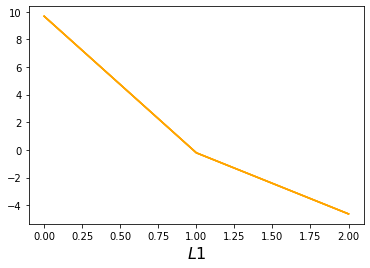

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='orange')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

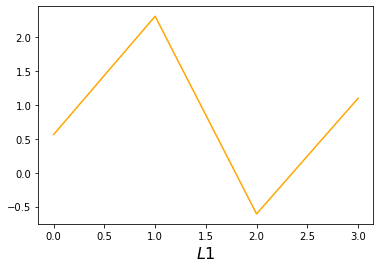

In [14]:
plt.plot(syn1_history[0], ms=3, lw=1.5, color='orange')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

--

## Advance 的 .ipynb 內容



## BP 演算法訓練的神經網路

目標: 嘗試著用輸入去預測輸出, 了解權重的更新

考慮以上情形： 給定三row輸入，試著去預測對應的一row輸出。

我們可以通過簡單測量輸入與輸出值的資料來解決這一問題。

最左邊的一 row 輸入值和輸出值是完美匹配/完全相關的。

反向傳播演算法便是通過這種方式來衡量資料間統計關係進而得到模型的。

## 參數定義

X 輸入資料集，形式為矩陣，每 1 column 代表 1 個訓練樣本。

y 輸出資料集，形式為矩陣，每 1 column 代表 1 個訓練樣本。

l0 網路第 1 層，即網路輸入層。

l1 網路第 2 層，常稱作隱藏層。

syn0 第一層權值，突觸 0 ，連接 l0 層與 l1 層。

逐元素相乘，故兩等長向量相乘等同於其對等元素分別相乘，結果為同等長度的向量。

– 元素相減，故兩等長向量相減等同於其對等元素分別相減，結果為同等長度的向量。

x.dot(y) 若 x 和 y 為向量，則進行點積操作；若均為矩陣，則進行矩陣相乘操作；若其中之一為矩陣，則進行向量與矩陣相乘操作。

In [15]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
'''
定義數學函數:
y=f(x) = 1/(1+np.exp(-x));
dy/dx = df = x*(1-x) 

為了計算方便, 這邊把 y=f(x) 與 dy/dx 放在同一function 裡面;
利用 deriv (derivative)做變數, 來分別指定方程式

'''    

def nonlin(x, deriv = False) :
    if (deriv == True) :
        return x * (1 - x)
    return 1/(1+np.exp(-x))
'''
通過 “nonlin” 函數體還能得到 sigmod 函數的導數（當形參 deriv 為 True 時）。
Sigmoid 函數優異特性之一，在於只用它的輸出值便可以得到其導數值。
若 Sigmoid 的輸出值用變數 out 表示，則其導數值可簡單通過式子 out *(1-out) 
'''

'''
input dataset
輸入資料集初始化為 numpy 中的矩陣。每一 column 為一個“訓練實例”，
每一 row 的對應著一個輸入節點。這樣，我們的神經網路便有 3 個輸入節點，
4 個訓練實例。
'''
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define output dataset 
y = np.array([[0,0,1,1]]).T

'''
輸出資料集進行初始化
.T” 為轉置函數。經轉置後，該  y  矩陣便包含 4 column 1 row。
同我們的輸入一致，每一 column 是一個訓練實例，而每一row（僅有一row）對應一個輸出節點。
因此，我們的網路含有 3 個輸入， 1 個輸出
'''

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
iter = 0

syn0_history = [syn0]
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）

## 神經網路訓練

for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [16]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    
    '''
    首先讓網路基於給定輸入“試著”去預測輸出。
    以至於作出一些調整，使得在每次反覆運算過程中網路能夠表現地更好一點。
    (4 x 3) dot (3 x 1) = (4 x 1)
    此 column 代碼包含兩個步驟。首先，將 l0 與 syn0 進行矩陣相乘。
    然後，將計算結果傳遞給 sigmoid 函數。具體考慮到各個矩陣的維度：
    (4 x 3) dot (3 x 1) = (4 x 1)
    '''
 
    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1, deriv = True)
    
    '''
    對於每一輸入，可知 l1 都有對應的一個“猜測”結果。那麼通過將真實的結果（y）與猜測結果（l1）作減，
    就可以對比得到網路預測的效果怎麼樣。
    l1_error 是一個有正數和負數組成的向量，它可以反映出網路的誤差有多大
    '''
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    
print("Output After Training:")
print("\n")
print(l1)

Output After Training:


[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


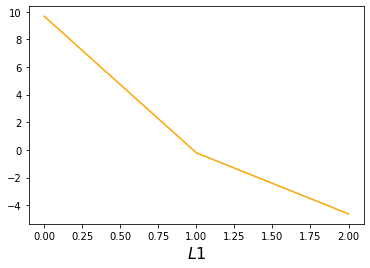

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='orange')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

## <font color="orange">乘法的反向傳播</font>

![img1](https://ai100-fileentity.cupoy.com/2nd/homework/D75/1562821375403/large)

--


## <font color="orange">加法的反向傳播</font>

![img2](https://ai100-fileentity.cupoy.com/2nd/homework/D75/1562821426353/large)

--


## <font color="orange">權重函數</font>

![img3](https://ai100-fileentity.cupoy.com/2nd/homework/D75/1562822007633/large)

--


## 推薦閱讀


## [Backpropagation](https://en.wikipedia.org/wiki/Backpropagation)


--


## [深度學習(Deep Learning)-反向傳播](https://ithelp.ithome.com.tw/articles/10198813)


### 前言


~~上一篇介紹到的神經網路流程為~~

~~1.輸入~~

~~2.權重.偏權重~~

~~3.活化函數~~

~~4.重複2 ~ 3步驟(依網路深度)~~

~~5.輸出函數~~

~~6.損失函數~~

~~7.計算梯度，數值微分(偏微分)~~

~~8.訓練權重(使用梯度下降)~~

~~9.重複2 ~ 8步驟(依訓練次數等等)~~



### 結論

> 最後修改一下原先的神經網路流程，書上所使用forward表示正向backward表示反向。
> 
> 1.輸入
> 
> 2.權重.偏權重(forward)
> 
> 3.活化函數(forward)
> 
> 4.重複2 ~ 3步驟(依網路深度)
> 
> 5.輸出 + 損失函數(forward)
> 
> 7.反向進行backward從輸出+損失開始->重複3 ~ 2(backward)，權重部分記錄dW和db才能更新權重。
> 
> 8.訓練權重(使用梯度下降)
> 
> 9.重複2 ~ 8步驟(依訓練次數等等)
> 
> ＊數值微分用處變為拿來驗證推導的反向傳播是否正確


當網路層數變多或維數變大若計算梯度則所需的計算量會變很大，因此神經網路之父提出了反向傳播，

在上次我們說道不符合人類思想，但仔細想想這其實是人類的"反思"，接下來介紹反向傳播是如何求出偏移量的。這裡單純用公式推倒介紹若有興趣可以買書看圖解。

--

### 反向傳播

反向傳播顧名思義就是由最後答案往回推，<font color="red">在這裡拿來推導梯度。</font>





--



## BP神經網路的原理及Python實現

 - [Blog連結](https://blog.csdn.net/conggova/article/details/77799464)

 - [完整的結構化代碼連結](https://github.com/conggova/SimpleBPNetwork.git)